In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from algorithm.clustering import dendrogram_extra
from scipy.cluster.hierarchy import dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from sklearn import metrics
from IPython.display import display, HTML

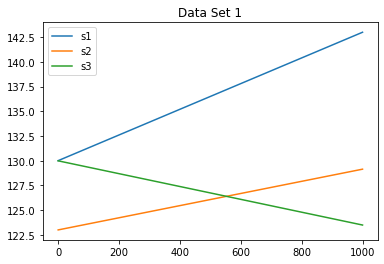

In [38]:
t = np.linspace(0, 1000, 1001) # assume 1 year has 250 days
t.size

# from data.generator import dgf_hpr_path
def dgf_hpr_path(t, s, R):
    """Holding-period Return path plot.
    
Example 1:

t = np.linspace(0, 50*np.pi, 1001) # discrete time axis of 1000 increments

plus15 = my_hpr_(t, 100, 0.15) # Return 15% from 100 principal
neg15 = my_hpr_(t, 100, -0.15) # Return -15% from 100 principal
    """    
    # R = 0.15 # 15 % return for the holding period.
    # s = 100 # start value, e = end value
    e = s + s * R
    g = s * R # gain/loss # 15.0
    c = g/t.size # gain/loss average per time unit
    a = np.ones(t.size) * c # accomulating...
    b = np.zeros(t.size) # base line, the starting amount
    b += a.cumsum()
    b += s # add principal amount
    
    # daily_vary = b.std()
    # noise = np.random.uniform(-daily_vary, daily_vary, (t.size,))# daily fluctuation
    # b += noise
    return b # series of increasing value corresponding to the holding period return

# Data 1 

series = {}
series['s1'] = dgf_hpr_path(t, 130, 0.10)
series['s2'] = dgf_hpr_path(t, 123, 0.05)
series['s3'] = dgf_hpr_path(t, 130, -0.05)
# series['s4'] = dgf_hpr_path(t, 100, 0.05)
# series['s5'] = dgf_hpr_path(t, 95, 0.03)
# series['s6'] = dgf_hpr_path(t, 90, 0.07)

for k, v in series.items():
    plt.plot(t, v, label=k)

plt.legend()
plt.title("Data Set 1")

series['t'] = t
ds1 = series
ds1 = pd.DataFrame(ds1)

In [3]:
series['s1'].var(), series['s1'].std(), series['s1'].mean()

(14.083319278124694, 3.7527748770909097, 136.50649350649354)

In [4]:
series['s2'].var(), series['s2'].std(), series['s2'].mean()

(3.1518718544192095, 1.7753511918545044, 126.07807192807189)

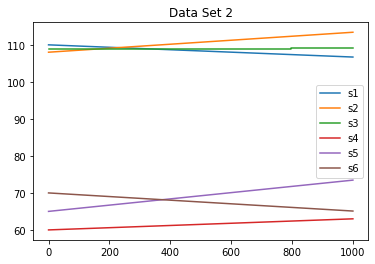

In [5]:
# Data 2

series = {}
series['s1'] = dgf_hpr_path(t, 110, -0.03)
series['s2'] = dgf_hpr_path(t, 108, 0.05)
series['s3'] = dgf_hpr_path(t, 109, 0.0001)
series['s4'] = dgf_hpr_path(t, 60, 0.05)
series['s5'] = dgf_hpr_path(t, 65, 0.13)
series['s6'] = dgf_hpr_path(t, 70, -0.07)

for k, v in series.items():
    plt.plot(t, v, label=k)

plt.legend()
plt.title("Data Set 2")

series['t'] = t
ds2 = series
ds2 = pd.DataFrame(ds2)

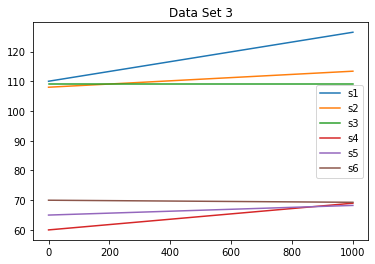

In [6]:
# Data 3

series = {}
series['s1'] = dgf_hpr_path(t, 110, 0.15)
series['s2'] = dgf_hpr_path(t, 108, 0.05)
series['s3'] = dgf_hpr_path(t, 109, 0.0001)
series['s4'] = dgf_hpr_path(t, 60, 0.15)
series['s5'] = dgf_hpr_path(t, 65, 0.05)
series['s6'] = dgf_hpr_path(t, 70, -0.01)

for k, v in series.items():
    plt.plot(t, v, label=k)

plt.legend()
plt.title("Data Set 3")

series['t'] = t
ds3 = series
ds3 = pd.DataFrame(ds3)

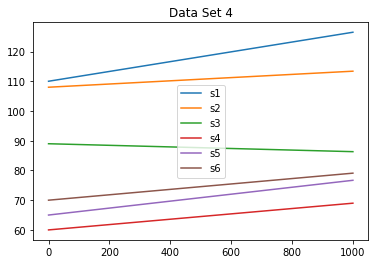

In [7]:
# Data 4

series = {}
series['s1'] = dgf_hpr_path(t, 110, 0.15)
series['s2'] = dgf_hpr_path(t, 108, 0.05)
series['s3'] = dgf_hpr_path(t, 89, -0.03)
series['s4'] = dgf_hpr_path(t, 60, 0.15)
series['s5'] = dgf_hpr_path(t, 65, 0.18)
series['s6'] = dgf_hpr_path(t, 70, 0.13)

for k, v in series.items():
    plt.plot(t, v, label=k)

plt.legend()
plt.title("Data Set 4")

series['t'] = t
ds4 = series
ds4 = pd.DataFrame(ds4)

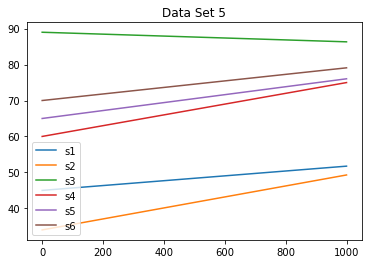

In [8]:
# Data 5

series = {}
series['s1'] = dgf_hpr_path(t, 45, 0.15)
series['s2'] = dgf_hpr_path(t, 34, 0.45)
series['s3'] = dgf_hpr_path(t, 89, -0.03)
series['s4'] = dgf_hpr_path(t, 60, 0.25)
series['s5'] = dgf_hpr_path(t, 65, 0.17)
series['s6'] = dgf_hpr_path(t, 70, 0.13)

for k, v in series.items():
    plt.plot(t, v, label=k)

plt.legend()
plt.title("Data Set 5")

series['t'] = t
ds5 = series
ds5 = pd.DataFrame(ds5)

In [9]:
from scipy.spatial.distance import correlation
from itertools import combinations
from scipy.spatial.distance import  euclidean, correlation, cosine, euclidean, cityblock
from fastdtw import fastdtw

def compute_daily_returns(ts):
    # daily return for Numpy array
    tmp = ts.copy()    
    tmp = np.roll(tmp,1) # np.roll(ts2.copy(), 1)
    ret = np.log(ts[1:]/tmp[1:]) # log-return
    return ret

def my_corr_dist(u,v):
    """adjust correlation distance measure between stock price time series.
       
       Computes the correlation distance between two 1-D arrays.
       https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.correlation.html
       
       First difference to get daily return before calculating the correlation.
    """
    r1 = compute_daily_returns(u)
    r2 = compute_daily_returns(v)
    return 1 - correlation(r1, r2)

def my_cosine_dist(u,v):
    r1 = compute_daily_returns(u)
    r2 = compute_daily_returns(v)
    return cosine(r1, r2)

def dtw_dist_ret(u, v):
    # use FastDTW (approximation of DTW) to measure dissimarity
    return fastdtw(u,v)[0]

dfuncs = {'distance_euclidean': euclidean, 'distance_cosine':cosine, 
          'distance_correlation':correlation, 'distance_cityblock': cityblock,
          'distance_corr_returns': my_corr_dist,
          'distance_dtw_returns': dtw_dist_ret }

def calc_distance_table_all(ds):
    labels = list(ds.keys())
    labels.remove('t') # Remove the time (sampling point) axis
    # labels to index into the series in data frame.

    # combination in Python. n choose 2
    dist_list = list(combinations(labels, 2))
    dist_list # the list of pair to calculate distance

    dcalc = pd.DataFrame() # for storing distance calculation result
    for c in dist_list:
        row = {}
        base,target = c[0], c[1]
        ts1 = ds[base].values
        ts2 = ds[target].values
        row['base'] = base
        row['target'] = target
        # Calculate distance
        for dname, f in dfuncs.items():
            row[dname] = f(ts1,ts2)
        dcalc = dcalc.append(row, ignore_index=True)
    return dcalc

calc_distance_table = calc_distance_table_all

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79550c910>,
      dtype=object)

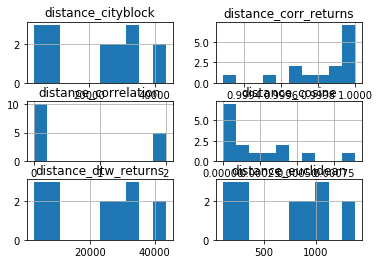

In [10]:
dt1 = calc_distance_table(ds1)
dt1.hist()

In [11]:
# 1. get data and distance matrix
def cluster_data(ds, dist_func, k=3):
    labels = list(ds.keys())
    labels.remove('t')
    X = [v for i, v in ds[labels].items()]
    # X  # items to cluster
    # Calculate distance matrix
    dm = pdist(X, dist_func) # Replace distance function here
    # dm
    df_dist = pd.DataFrame(squareform(dm)) # need better way to show table
    display(df_dist)
    
    Z = linkage(dm, method='single')
    # Z
    fig = plt.figure(figsize=(8, 4))
    dn = dendrogram_extra(Z, labels=labels)
    plt.title('%s, Single Linkage' % str(dist_func.__name__))
    
    k = k
    c = fcluster(Z, k, criterion='maxclust')
    
    return X, dm, Z, c

def calculate_score(X, c):
    scores = {'calinski_harabasz': metrics.calinski_harabasz_score(X, c),
          'silhouette': metrics.silhouette_score(X, c, metric='euclidean'),
          'davies_bouldin': metrics.davies_bouldin_score(X, c)}
    return pd.DataFrame(data={'score':scores})

def output_summary(ds, clusters):
    # ds1[labels].std() # compute standard deviation
    labels = list(ds.keys())
    labels.remove('t')

    # difference in value: return
    start = ds[labels][0:1].values
    end = ds[labels][-1:].values
    diff = ds[labels][-1:].values - ds[labels][0:1].values
    pct_return = (diff / start)[0]
    output = {'series': labels, 'label': clusters, 'st.dev': ds[labels].std(), 'return': pct_return}
    ds[labels].std()
    return pd.DataFrame(output)

def plot_results(ds, X, clusters): 
    # plot with first value and last value 
    labels = list(ds.keys())
    labels.remove('t')
    
    # obtain K from cluster 
    k = np.unique(clusters).size

    # X[0] # this is pd.Series object
    firsts = np.array(list(map(lambda ts: ts.values[0], X)))  # Standard deviation is X-axis
    lasts = np.array(list(map(lambda ts: ts.values[-1], X))) # Mean is Y-axis

    returns = (lasts - firsts) / firsts * 100 # Returns in pct

    plt.figure(figsize=(16, 6))
    # Plot 1
    plt.subplot(1,2,1)
    plt.scatter(lasts, returns, c=clusters, cmap='RdYlGn')  # plot points with cluster dependent colors
    plt.title("Clustered time-series: each dot is a time-series summary, \ncolor labels the group assigned by clustering. \nCut at k=%s." % k)
    plt.xlabel("Last Prices")
    plt.ylabel("Return (%)")

    # Add label:
    for label, x, y in zip(labels, lasts, returns):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    
    # Plot 2
    plt.subplot(1,2,2)
    st_devs = list(map(np.std, X))  # Standard deviation is X-axis
    means = list(map(lambda ts: np.mean(ts), X)) # Mean is Y-axis
    plt.scatter(lasts, st_devs, c=clusters, cmap='prism')  # plot points with cluster dependent colors
    plt.title("Clustered time-series: each dot is a time-series summary, \ncolor labels the group assigned by clustering. \nCut at k=%s." % k)
    plt.xlabel("Last Prices")
    plt.ylabel("St.Dev")

    # Add label:
    for label, x, y in zip(labels, lasts, st_devs):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')


# Data Set 1 Cluster

,0,1,2
0,0.000000,335.819659,356.464498
1,335.819659,0.000000,117.456852
2,356.464498,117.456852,0.000000


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

<Figure size 576x288 with 0 Axes>

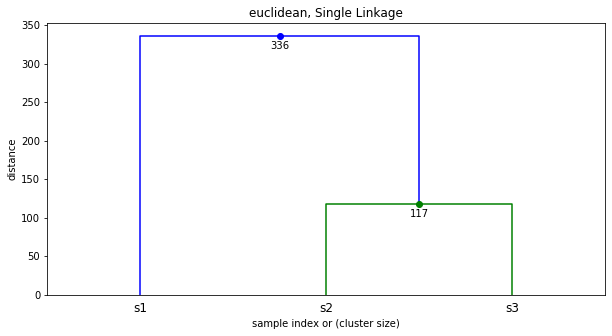

In [39]:
X, dm, Z, clusters = cluster_data(ds1, euclidean)
df_summary = output_summary(ds1, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.000090,1.999107,0.000090,0.000180,0.000032
1,0.000090,0.000000,1.999584,0.000000,0.000015,0.000015
2,1.999107,1.999584,0.000000,1.999584,1.999728,1.999412
3,0.000090,0.000000,1.999584,0.000000,0.000015,0.000015
4,0.000180,0.000015,1.999728,0.000015,0.000000,0.000060
5,0.000032,0.000015,1.999412,0.000015,0.000060,0.000000


,series,label,st.dev,return
s1,s1,1,3.754651,0.099890
s2,s2,1,1.776239,0.049948
s3,s3,2,1.877325,-0.049953
s4,s4,1,1.444096,0.049948
s5,s5,1,0.823135,0.029969
s6,s6,1,1.819562,0.069925


,score
calinski_harabasz,0.593373
davies_bouldin,1.002960
silhouette,-0.092229


<Figure size 576x288 with 0 Axes>

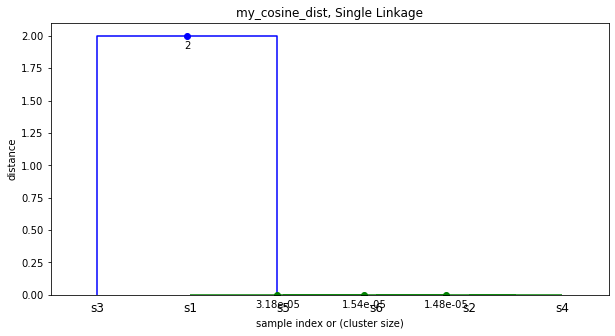

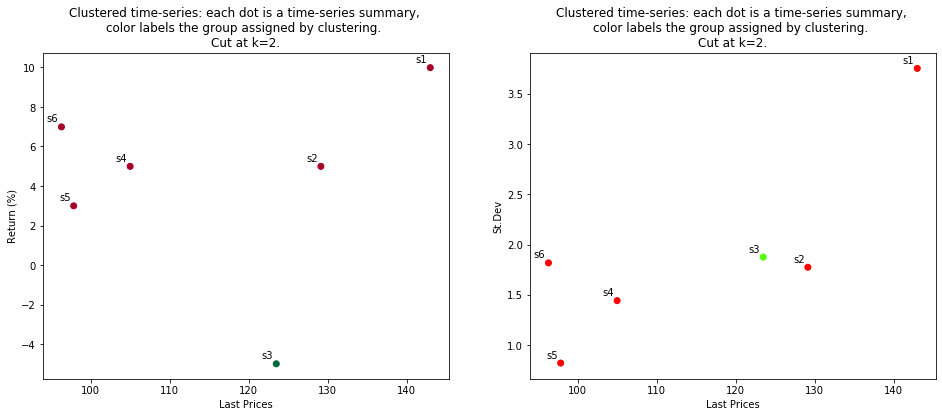

In [13]:
X, dm, Z, clusters = cluster_data(ds1, my_cosine_dist, k=2) # 
df_summary = output_summary(ds1, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.00,10438.850000,9769.500000,34038.00,40120.150000,43396.700000
1,10438.85,0.000000,3201.042308,23599.15,29681.300000,32957.850000
2,9769.50,3201.042308,0.000000,24268.50,30350.650000,33627.200000
3,34038.00,23599.150000,24268.500000,0.00,6082.150000,9358.700000
4,40120.15,29681.300000,30350.650000,6082.15,0.000000,2411.362488
5,43396.70,32957.850000,33627.200000,9358.70,2411.362488,0.000000


,series,label,st.dev,return
s1,s1,3,3.754651,0.099890
s2,s2,2,1.776239,0.049948
s3,s3,2,1.877325,-0.049953
s4,s4,1,1.444096,0.049948
s5,s5,1,0.823135,0.029969
s6,s6,1,1.819562,0.069925


,score
calinski_harabasz,47.332210
davies_bouldin,0.179772
silhouette,0.608138


<Figure size 576x288 with 0 Axes>

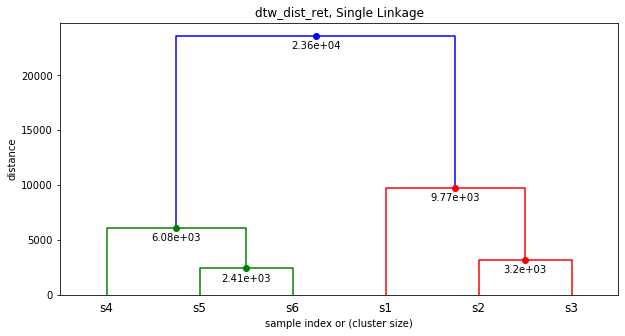

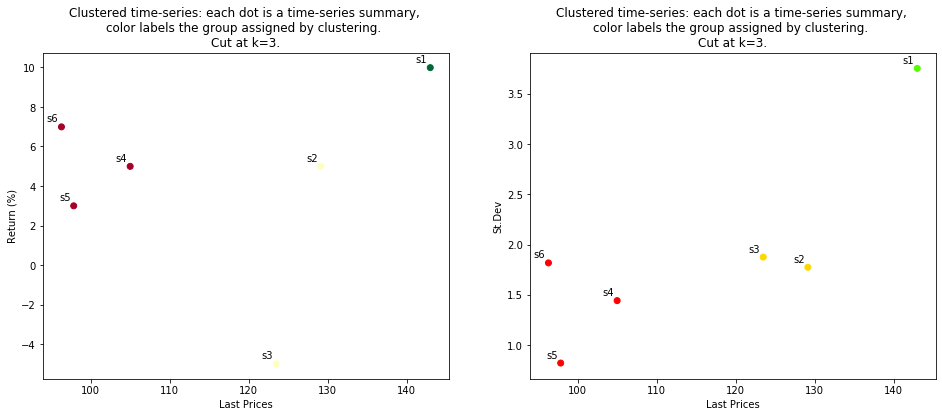

In [14]:
X, dm, Z, clusters = cluster_data(ds1, dtw_dist_ret)
df_summary = output_summary(ds1, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

# Data Set 2 Cluster

,0,1,2,3,4,5
0,0.000000,108.914129,36.696521,1483.284559,1242.317757,1290.962225
1,108.914129,0.000000,72.843176,1556.810586,1312.457728,1368.604603
2,36.696521,72.843176,0.000000,1503.205859,1260.821871,1312.435991
3,1483.284559,1556.810586,1503.205859,0.000000,249.509700,204.444007
4,1242.317757,1312.457728,1260.821871,249.509700,0.000000,133.032133
5,1290.962225,1368.604603,1312.435991,204.444007,133.032133,0.000000


,series,label,st.dev,return
s1,s1,1,0.953104,-0.029971
s2,s2,1,1.559624,0.049948
s3,s3,1,0.003148,0.000100
s4,s4,3,0.866458,0.049948
s5,s5,2,2.440523,0.129853
s6,s6,2,1.415215,-0.069935


,score
calinski_harabasz,283.800992
davies_bouldin,0.230782
silhouette,0.608047


<Figure size 576x288 with 0 Axes>

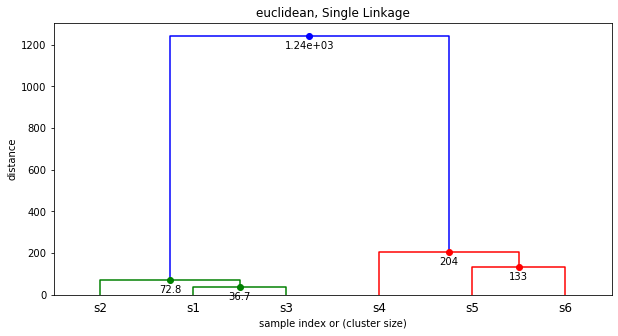

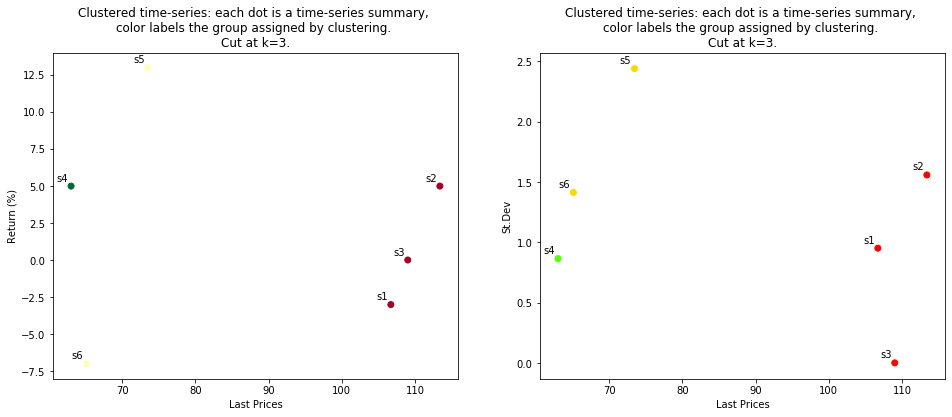

In [15]:
X, dm, Z, clusters = cluster_data(ds2, euclidean)
df_summary = output_summary(ds2, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,1.999739,1.999961,1.999739,1.999031,0.000074
1,1.999739,0.000000,0.000099,0.000000,0.000224,1.999388
2,1.999961,0.000099,0.000000,0.000099,0.000620,1.999780
3,1.999739,0.000000,0.000099,0.000000,0.000224,1.999388
4,1.999031,0.000224,0.000620,0.000224,0.000000,1.998424
5,0.000074,1.999388,1.999780,1.999388,1.998424,0.000000


,series,label,st.dev,return
s1,s1,1,0.953104,-0.029971
s2,s2,2,1.559624,0.049948
s3,s3,2,0.003148,0.000100
s4,s4,2,0.866458,0.049948
s5,s5,2,2.440523,0.129853
s6,s6,1,1.415215,-0.069935


,score
calinski_harabasz,0.011011
davies_bouldin,17.600701
silhouette,-0.316165


<Figure size 576x288 with 0 Axes>

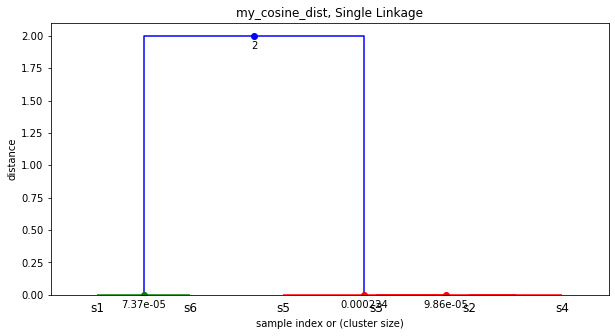

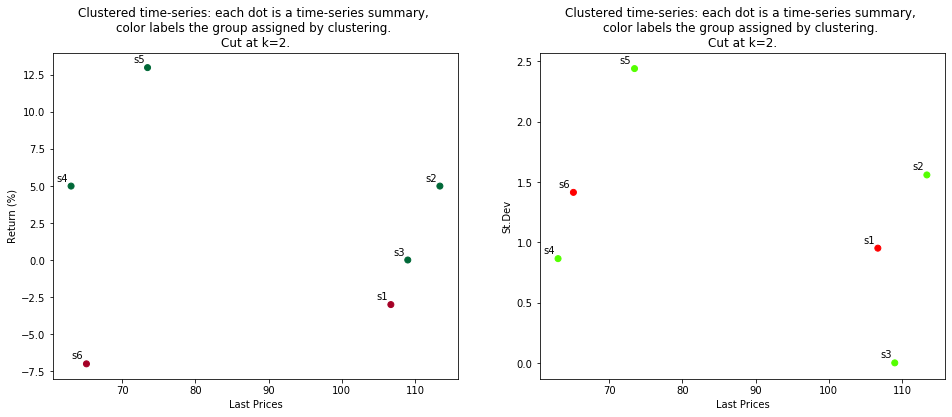

In [16]:
X, dm, Z, clusters = cluster_data(ds2, my_cosine_dist, k=2)
df_summary = output_summary(ds2, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,2814.930769,959.096349,46893.7000,39158.250000,40841.600000
1,2814.930769,0.000000,1883.401777,49250.4000,41514.950000,43198.300000
2,959.096349,1883.401777,0.000000,47551.4609,39816.010900,41499.360900
3,46893.700000,49250.400000,47551.460900,0.0000,7735.450000,6052.100000
4,39158.250000,41514.950000,39816.010900,7735.4500,0.000000,3552.882967
5,40841.600000,43198.300000,41499.360900,6052.1000,3552.882967,0.000000


,series,label,st.dev,return
s1,s1,1,0.953104,-0.029971
s2,s2,1,1.559624,0.049948
s3,s3,1,0.003148,0.000100
s4,s4,3,0.866458,0.049948
s5,s5,2,2.440523,0.129853
s6,s6,2,1.415215,-0.069935


,score
calinski_harabasz,283.800992
davies_bouldin,0.230782
silhouette,0.608047


<Figure size 576x288 with 0 Axes>

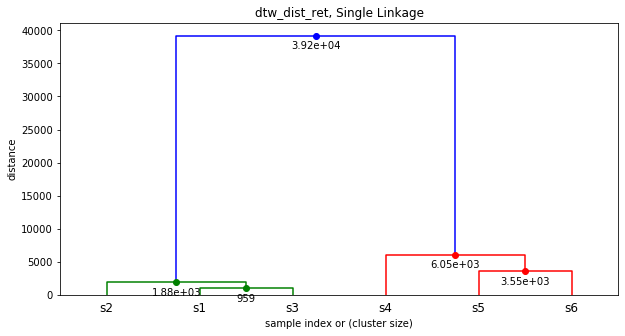

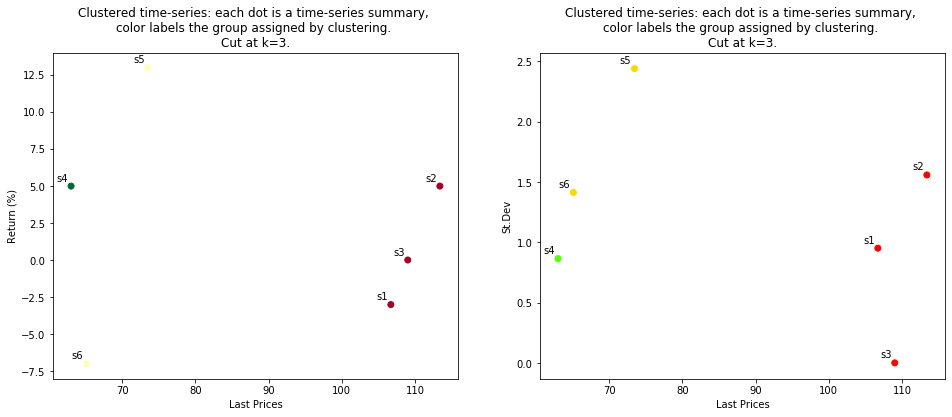

In [17]:
X, dm, Z, clusters = cluster_data(ds2, dtw_dist_ret)
df_summary = output_summary(ds2, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

# Data Set 3 Cluster

,0,1,2,3,4,5
0,0.000000,259.655725,329.210933,1702.071351,1638.027675,1545.909414
1,259.655725,0.000000,72.843176,1462.015459,1394.642817,1300.054594
2,329.210933,72.843176,0.000000,1410.339022,1341.132566,1245.178875
3,1702.071351,1462.015459,1410.339022,0.000000,85.240195,185.331480
4,1638.027675,1394.642817,1341.132566,85.240195,0.000000,102.222004
5,1545.909414,1300.054594,1245.178875,185.331480,102.222004,0.000000


,series,label,st.dev,return
s1,s1,3,4.765518,0.149828
s2,s2,2,1.559624,0.049948
s3,s3,2,0.003148,0.000100
s4,s4,1,2.599374,0.149828
s5,s5,1,0.938663,0.049948
s6,s6,1,0.202174,-0.009990


,score
calinski_harabasz,239.835922
davies_bouldin,0.107540
silhouette,0.703750


<Figure size 576x288 with 0 Axes>

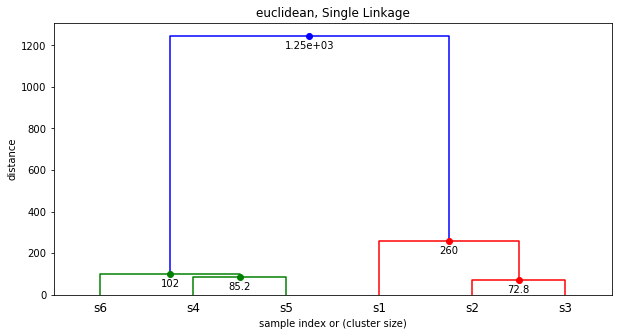

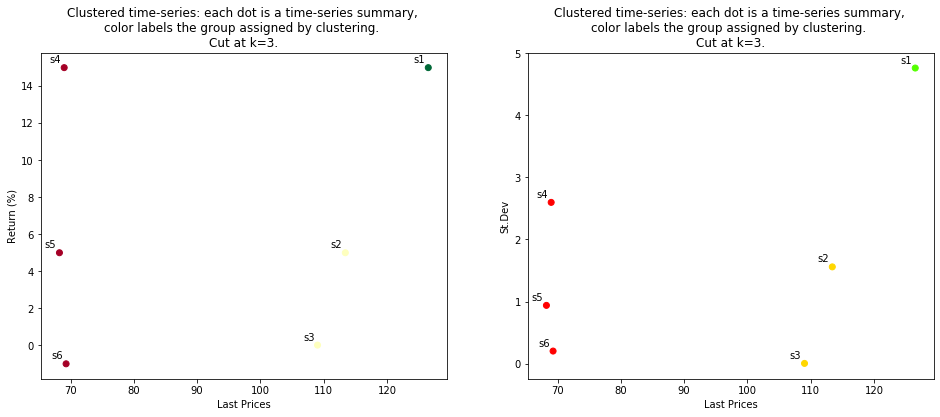

In [18]:
X, dm, Z, clusters = cluster_data(ds3, euclidean)
df_summary = output_summary(ds3, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.000344,0.000811,0.000000,0.000344,1.999067
1,0.000344,0.000000,0.000099,0.000344,0.000000,1.999856
2,0.000811,0.000099,0.000000,0.000811,0.000099,1.999996
3,0.000000,0.000344,0.000811,0.000000,0.000344,1.999067
4,0.000344,0.000000,0.000099,0.000344,0.000000,1.999856
5,1.999067,1.999856,1.999996,1.999067,1.999856,0.000000


,series,label,st.dev,return
s1,s1,1,4.765518,0.149828
s2,s2,2,1.559624,0.049948
s3,s3,2,0.003148,0.000100
s4,s4,1,2.599374,0.149828
s5,s5,2,0.938663,0.049948
s6,s6,3,0.202174,-0.009990


,score
calinski_harabasz,0.289540
davies_bouldin,6.603567
silhouette,-0.340912


<Figure size 576x288 with 0 Axes>

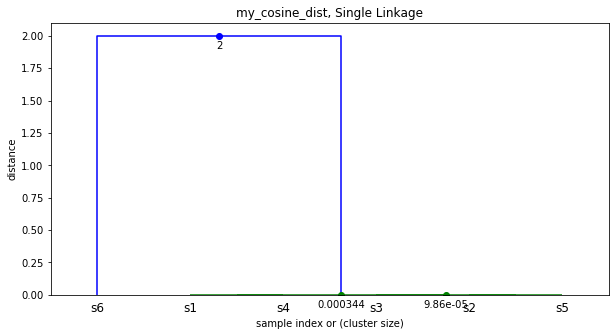

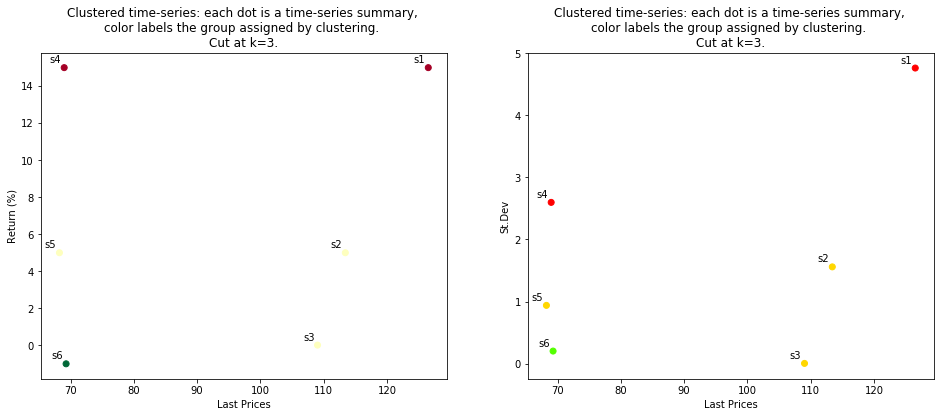

In [19]:
X, dm, Z, clusters = cluster_data(ds3, my_cosine_dist)
df_summary = output_summary(ds3, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.0000,5590.500000,9262.039100,53807.500000,51683.250000,48657.2000
1,5590.5000,0.000000,1883.401777,46244.400000,44120.150000,41094.1000
2,9262.0391,1883.401777,0.000000,44545.460900,42421.210900,39395.1609
3,53807.5000,46244.400000,44545.460900,0.000000,1423.485265,5150.3000
4,51683.2500,44120.150000,42421.210900,1423.485265,0.000000,3026.0500
5,48657.2000,41094.100000,39395.160900,5150.300000,3026.050000,0.0000


,series,label,st.dev,return
s1,s1,3,4.765518,0.149828
s2,s2,2,1.559624,0.049948
s3,s3,2,0.003148,0.000100
s4,s4,1,2.599374,0.149828
s5,s5,1,0.938663,0.049948
s6,s6,1,0.202174,-0.009990


,score
calinski_harabasz,239.835922
davies_bouldin,0.107540
silhouette,0.703750


<Figure size 576x288 with 0 Axes>

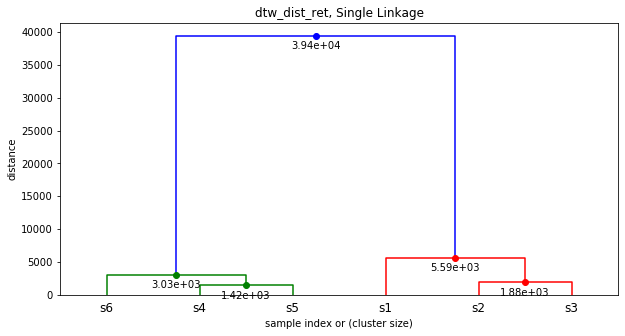

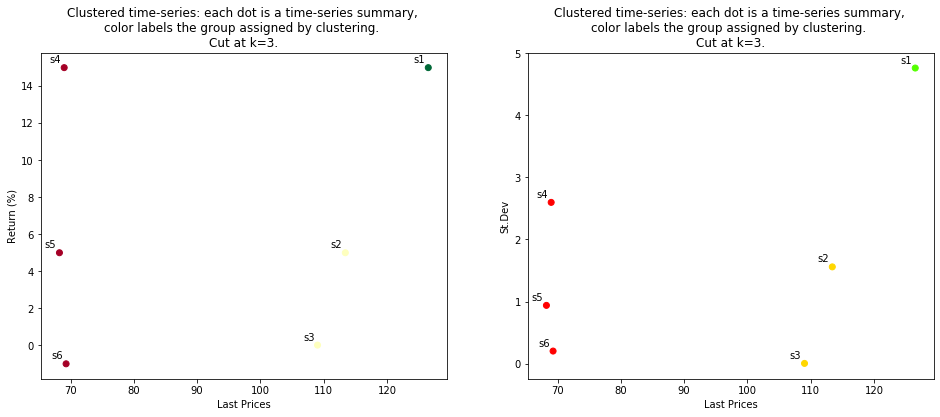

In [20]:
X, dm, Z, clusters = cluster_data(ds3, dtw_dist_ret)
df_summary = output_summary(ds3, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.999725,0.999352,1.000000,0.999725,0.999254
1,0.999725,0.000000,0.999921,0.999725,1.000000,0.999885
2,0.999352,0.999921,0.000000,0.999352,0.999921,0.999997
3,1.000000,0.999725,0.999352,0.000000,0.999725,0.999254
4,0.999725,1.000000,0.999921,0.999725,0.000000,0.999885
5,0.999254,0.999885,0.999997,0.999254,0.999885,0.000000


,series,label,st.dev,return
s1,s1,1,4.765518,0.149828
s2,s2,3,1.559624,0.049948
s3,s3,1,0.003148,0.000100
s4,s4,1,2.599374,0.149828
s5,s5,2,0.938663,0.049948
s6,s6,1,0.202174,-0.009990


,score
calinski_harabasz,0.653386
davies_bouldin,1.093493
silhouette,-0.588075


<Figure size 576x288 with 0 Axes>

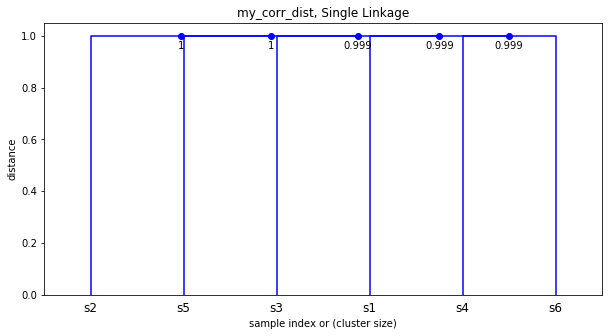

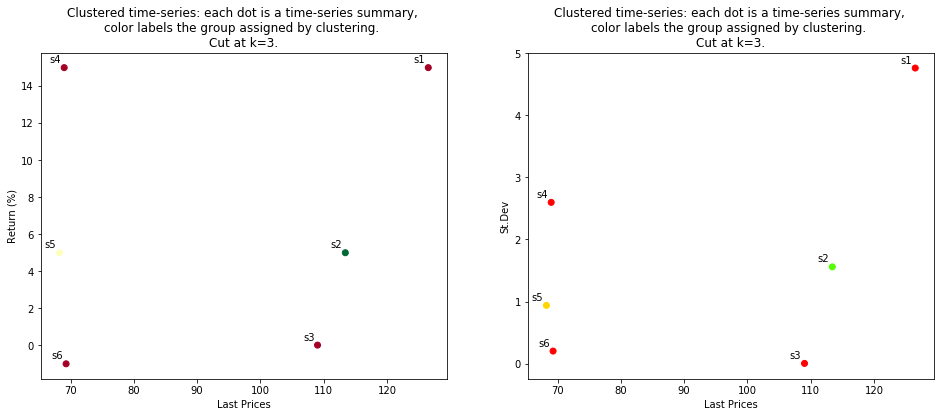

In [21]:
X, dm, Z, clusters = cluster_data(ds3, my_corr_dist)
df_summary = output_summary(ds3, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

# Data Set 4 Cluster

,0,1,2,3,4,5
0,0.000000,259.655725,983.676137,1702.071351,1500.385352,1384.373857
1,259.655725,0.000000,732.639230,1462.015459,1262.010413,1144.175487
2,983.676137,732.639230,0.000000,740.434976,547.732284,428.458680
3,1702.071351,1462.015459,740.434976,0.000000,202.455121,317.970662
4,1500.385352,1262.010413,547.732284,202.455121,0.000000,119.406733
5,1384.373857,1144.175487,428.458680,317.970662,119.406733,0.000000


,series,label,st.dev,return
s1,s1,1,4.765518,0.149828
s2,s2,1,1.559624,0.049948
s3,s3,3,0.771148,-0.029971
s4,s4,2,2.599374,0.149828
s5,s5,2,3.379186,0.179788
s6,s6,2,2.628256,0.129853


,score
calinski_harabasz,41.795982
davies_bouldin,0.194764
silhouette,0.537662


<Figure size 576x288 with 0 Axes>

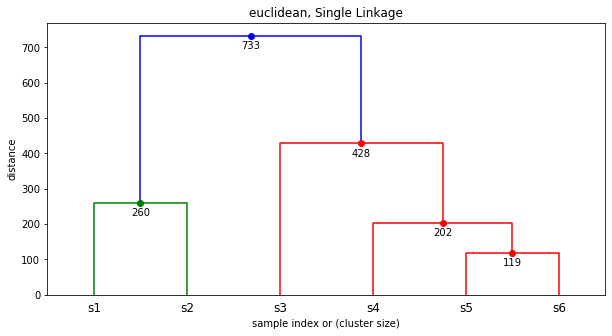

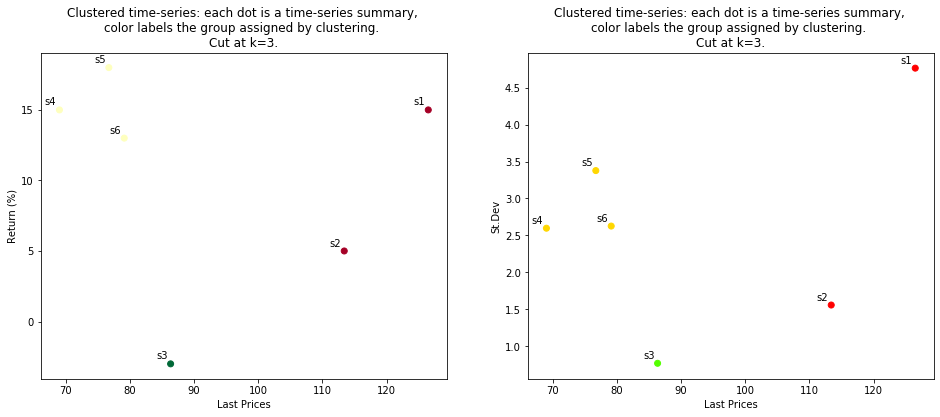

In [22]:
X, dm, Z, clusters = cluster_data(ds4, euclidean)
df_summary = output_summary(ds4, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.000344,1.998796,0.000000,0.000028,0.000013
1,0.000344,0.000000,1.999739,0.000344,0.000566,0.000224
2,1.998796,1.999739,0.000000,1.998796,1.998405,1.999031
3,0.000000,0.000344,1.998796,0.000000,0.000028,0.000013
4,0.000028,0.000566,1.998405,0.000028,0.000000,0.000078
5,0.000013,0.000224,1.999031,0.000013,0.000078,0.000000


,series,label,st.dev,return
s1,s1,1,4.765518,0.149828
s2,s2,2,1.559624,0.049948
s3,s3,3,0.771148,-0.029971
s4,s4,1,2.599374,0.149828
s5,s5,1,3.379186,0.179788
s6,s6,1,2.628256,0.129853


,score
calinski_harabasz,0.558424
davies_bouldin,1.945696
silhouette,-0.203899


<Figure size 576x288 with 0 Axes>

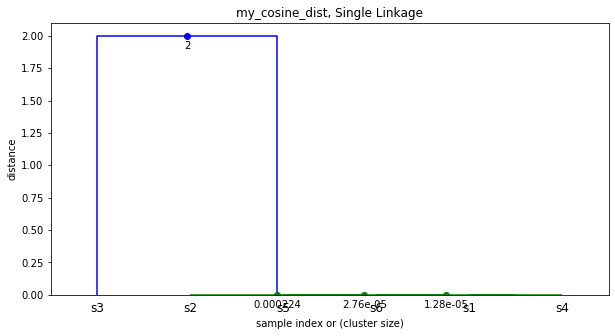

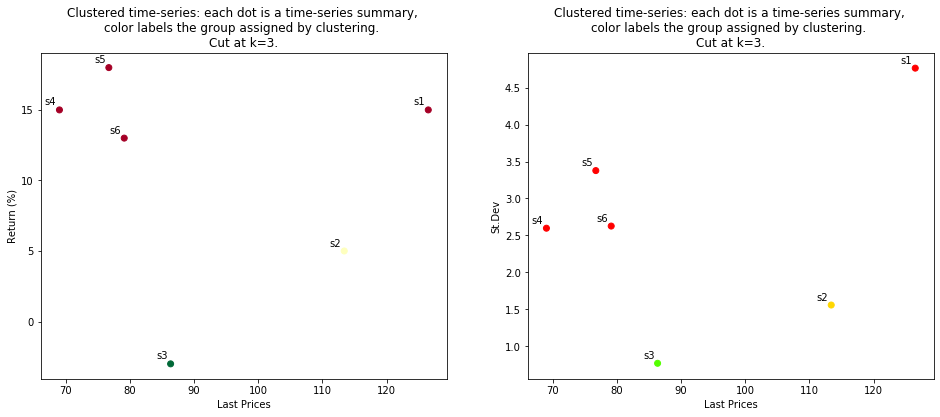

In [23]:
X, dm, Z, clusters = cluster_data(ds4, my_cosine_dist)
df_summary = output_summary(ds4, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.00,5590.50,30625.17,53807.50000,47449.800000,43747.400000
1,5590.50,0.00,23062.07,46244.40000,39886.700000,36184.300000
2,30625.17,23062.07,0.00,23182.33000,16824.630000,13122.230000
3,53807.50,46244.40,23182.33,0.00000,3935.719780,10060.100000
4,47449.80,39886.70,16824.63,3935.71978,0.000000,1390.955844
5,43747.40,36184.30,13122.23,10060.10000,1390.955844,0.000000


,series,label,st.dev,return
s1,s1,1,4.765518,0.149828
s2,s2,1,1.559624,0.049948
s3,s3,3,0.771148,-0.029971
s4,s4,2,2.599374,0.149828
s5,s5,2,3.379186,0.179788
s6,s6,2,2.628256,0.129853


,score
calinski_harabasz,41.795982
davies_bouldin,0.194764
silhouette,0.537662


<Figure size 576x288 with 0 Axes>

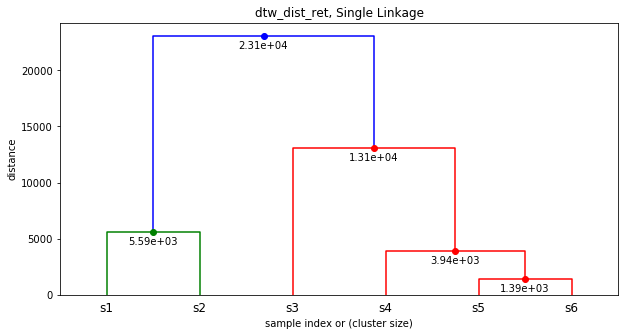

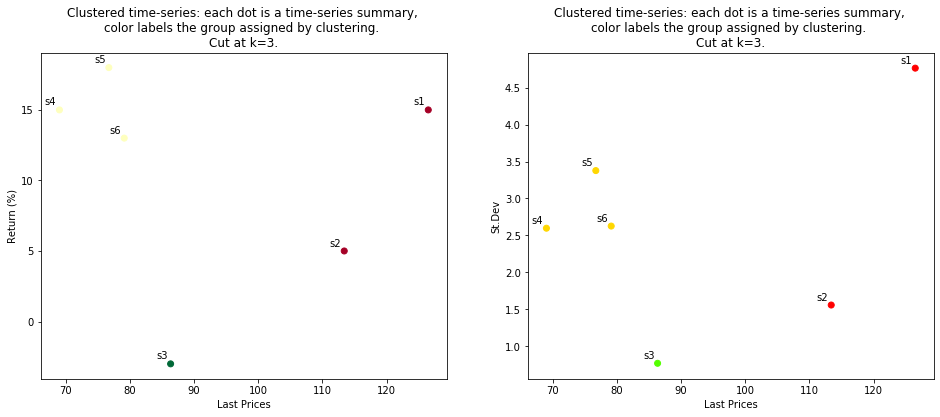

In [24]:
X, dm, Z, clusters = cluster_data(ds4, dtw_dist_ret)
df_summary = output_summary(ds4, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.999725,0.999037,1.000000,0.999978,0.999990
1,0.999725,0.000000,0.999791,0.999725,0.999547,0.999821
2,0.999037,0.999791,0.000000,0.999037,0.998724,0.999225
3,1.000000,0.999725,0.999037,0.000000,0.999978,0.999990
4,0.999978,0.999547,0.998724,0.999978,0.000000,0.999938
5,0.999990,0.999821,0.999225,0.999990,0.999938,0.000000


,series,label,st.dev,return
s1,s1,1,4.765518,0.149828
s2,s2,3,1.559624,0.049948
s3,s3,1,0.771148,-0.029971
s4,s4,1,2.599374,0.149828
s5,s5,1,3.379186,0.179788
s6,s6,2,2.628256,0.129853


,score
calinski_harabasz,0.621890
davies_bouldin,1.357154
silhouette,-0.454718


<Figure size 576x288 with 0 Axes>

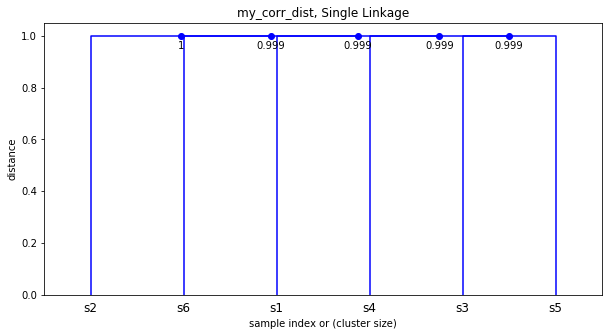

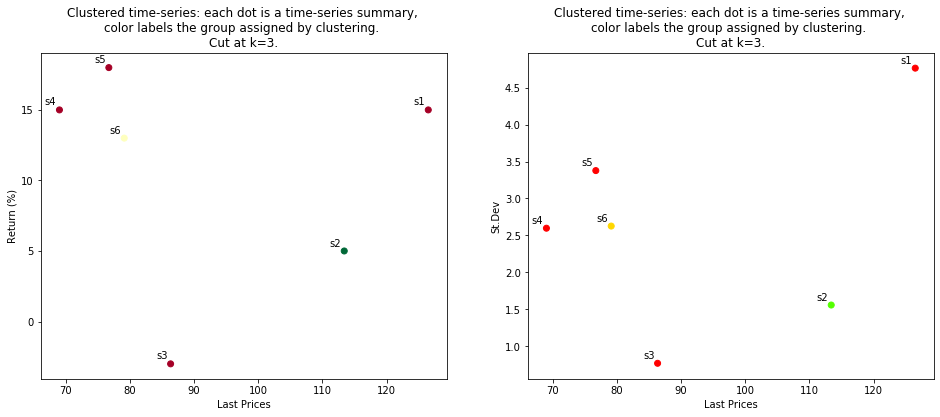

In [26]:
X, dm, Z, clusters = cluster_data(ds4, my_corr_dist)
df_summary = output_summary(ds4, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

# Data Set 5 Cluster

,0,1,2,3,4,5
0,0.000000,226.520045,1245.905214,609.890753,701.962068,828.455150
1,226.520045,0.000000,1464.789321,817.857246,914.321272,1042.350696
2,1245.905214,1464.789321,0.000000,657.816603,556.363613,428.458680
3,609.890753,817.857246,657.816603,0.000000,102.222004,229.378176
4,701.962068,914.321272,556.363613,102.222004,0.000000,128.554150
5,828.455150,1042.350696,428.458680,229.378176,128.554150,0.000000


,series,label,st.dev,return
s1,s1,1,1.949530,0.149828
s2,s2,1,4.418935,0.449348
s3,s3,2,0.771148,-0.029971
s4,s4,2,4.332289,0.249688
s5,s5,2,3.191453,0.169801
s6,s6,2,2.628256,0.129853


,score
calinski_harabasz,17.411868
davies_bouldin,0.335237
silhouette,0.674634


<Figure size 576x288 with 0 Axes>

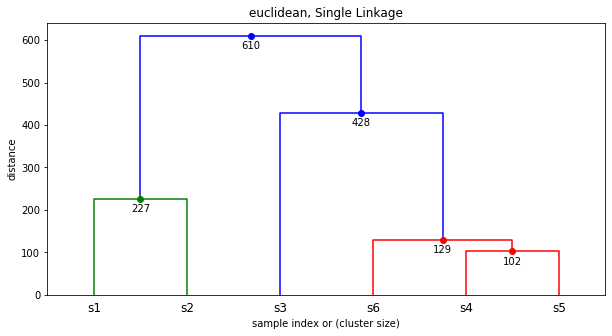

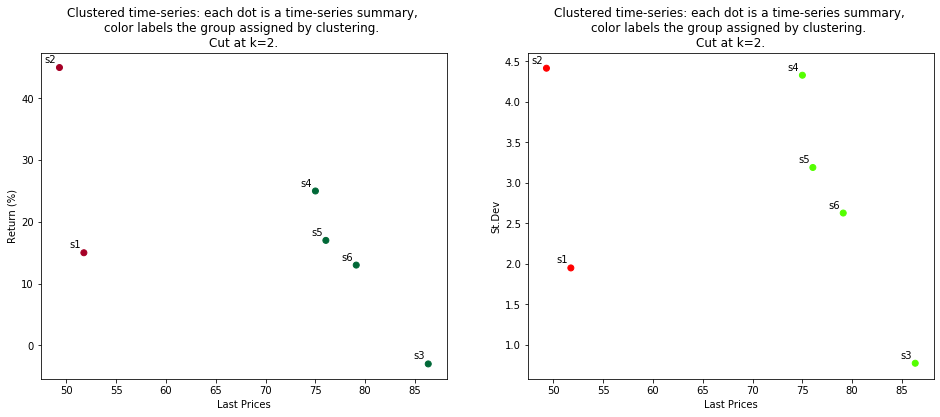

In [31]:
X, dm, Z, clusters = cluster_data(ds5, euclidean, k=2)
df_summary = output_summary(ds5, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.002230,1.998796,0.000289,0.000012,0.000013
1,0.002230,0.000000,1.993313,0.000915,0.001911,0.002579
2,1.998796,1.993313,0.000000,1.997331,1.998540,1.999031
3,0.000289,0.000915,1.997331,0.000000,0.000182,0.000423
4,0.000012,0.001911,1.998540,0.000182,0.000000,0.000050
5,0.000013,0.002579,1.999031,0.000423,0.000050,0.000000


,series,label,st.dev,return
s1,s1,1,1.949530,0.149828
s2,s2,1,4.418935,0.449348
s3,s3,2,0.771148,-0.029971
s4,s4,1,4.332289,0.249688
s5,s5,1,3.191453,0.169801
s6,s6,1,2.628256,0.129853


,score
calinski_harabasz,2.939992
davies_bouldin,0.453547
silhouette,0.213875


<Figure size 576x288 with 0 Axes>

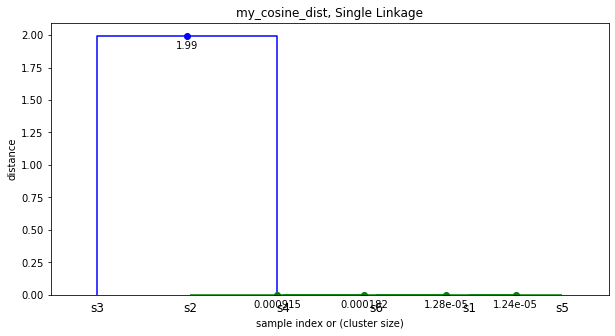

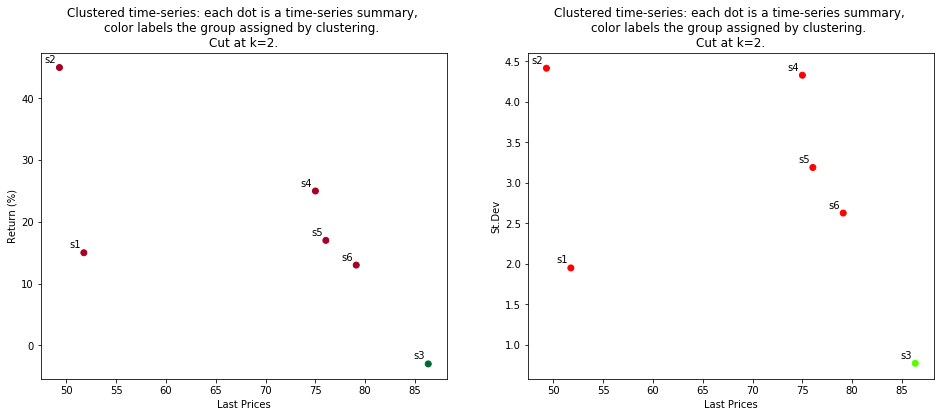

In [32]:
X, dm, Z, clusters = cluster_data(ds5, my_cosine_dist, k=2)
df_summary = output_summary(ds5, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,4406.286563,39324.58,19148.250000,22174.300000,26202.350000
1,4406.286563,0.000000,46052.03,25875.700000,28901.750000,32929.800000
2,39324.580000,46052.030000,0.00,20176.330000,17150.280000,13122.230000
3,19148.250000,25875.700000,20176.33,0.000000,889.199301,4266.389011
4,22174.300000,28901.750000,17150.28,889.199301,0.000000,1648.964286
5,26202.350000,32929.800000,13122.23,4266.389011,1648.964286,0.000000


,series,label,st.dev,return
s1,s1,1,1.949530,0.149828
s2,s2,1,4.418935,0.449348
s3,s3,2,0.771148,-0.029971
s4,s4,2,4.332289,0.249688
s5,s5,2,3.191453,0.169801
s6,s6,2,2.628256,0.129853


,score
calinski_harabasz,17.411868
davies_bouldin,0.335237
silhouette,0.674634


<Figure size 576x288 with 0 Axes>

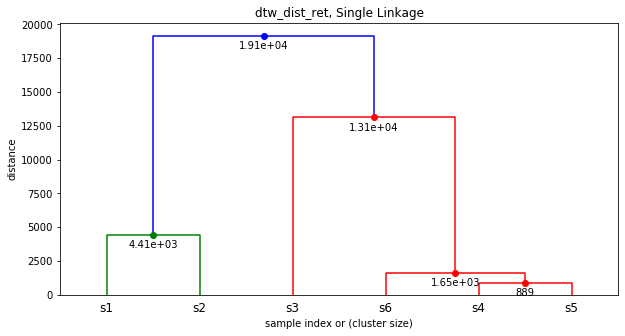

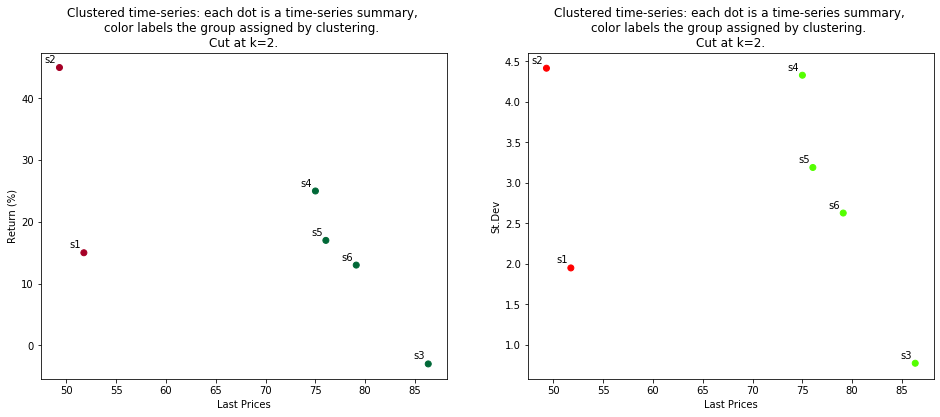

In [33]:
X, dm, Z, clusters = cluster_data(ds5, dtw_dist_ret, k=2)
df_summary = output_summary(ds5, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

,0,1,2,3,4,5
0,0.000000,0.998215,0.999037,0.999769,0.999990,0.999990
1,0.998215,0.000000,0.994647,0.999268,0.998470,0.997935
2,0.999037,0.994647,0.000000,0.997864,0.998832,0.999225
3,0.999769,0.999268,0.997864,0.000000,0.999855,0.999661
4,0.999990,0.998470,0.998832,0.999855,0.000000,0.999960
5,0.999990,0.997935,0.999225,0.999661,0.999960,0.000000


,series,label,st.dev,return
s1,s1,2,1.949530,0.149828
s2,s2,1,4.418935,0.449348
s3,s3,1,0.771148,-0.029971
s4,s4,1,4.332289,0.249688
s5,s5,3,3.191453,0.169801
s6,s6,1,2.628256,0.129853


,score
calinski_harabasz,0.446878
davies_bouldin,3.568593
silhouette,-0.455776


<Figure size 576x288 with 0 Axes>

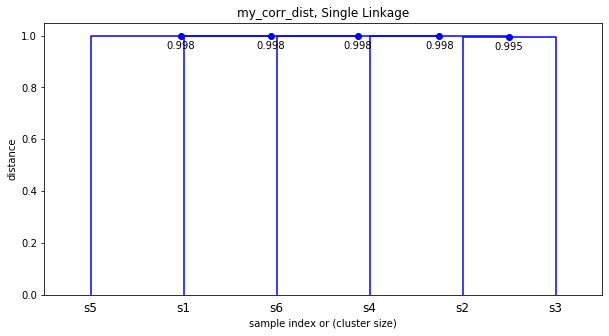

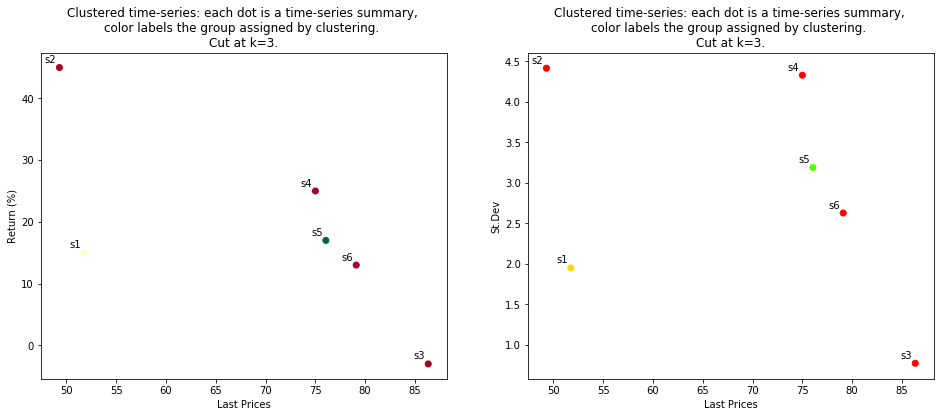

In [30]:
X, dm, Z, clusters = cluster_data(ds5, my_corr_dist)
df_summary = output_summary(ds5, clusters)
df_score = calculate_score(X, clusters)
display(df_summary)
display(df_score)
plot_results(ds1, X, clusters)

In [ ]:
ds1.std()

Text(0.5, 1.0, 'Daily return of series in data set 1')

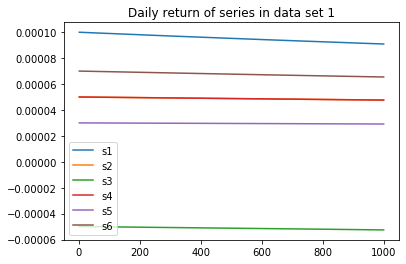

In [34]:
for s in ['s1', 's2', 's3', 's4', 's5', 's6']:
    plt.plot(t[1:],compute_daily_returns(ds1[s].values), label=s)
plt.legend()
plt.title("Daily return of series in data set 1")

In [ ]:
for s in ['s1', 's2', 's3', 's4', 's5', 's6']:
    plt.plot(t[1:],compute_daily_returns(ds1[s].values), label=s)
plt.legend()
plt.title("Daily return of series in data set 1")